# Contenedores para Machine Leaning

### Load Adult Census Dataset Using SHAP

In [2]:
import shap

X, y = shap.datasets.adult()
X_display, y_display = shap.datasets.adult(display=True)
feature_names = list(X.columns)
feature_names

['Age',
 'Workclass',
 'Education-Num',
 'Marital Status',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'Capital Gain',
 'Capital Loss',
 'Hours per week',
 'Country']

#### Overview the Dataset

In [3]:
display(X.describe())

,Age,Workclass,Education-Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581646,3.868892,10.080679,2.611836,6.572740,2.494518,3.665858,0.669205,1077.648804,87.303833,40.437454,36.718866
std,13.640432,1.455960,2.572720,1.506222,4.228857,1.758232,0.848806,0.470506,7385.291992,402.960205,12.347429,7.823782
min,17.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,4.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,39.000000
50%,37.000000,4.000000,10.000000,2.000000,7.000000,3.000000,4.000000,1.000000,0.000000,0.000000,40.000000,39.000000
75%,48.000000,4.000000,12.000000,4.000000,10.000000,4.000000,4.000000,1.000000,0.000000,0.000000,45.000000,39.000000
max,90.000000,8.000000,16.000000,6.000000,14.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,41.000000


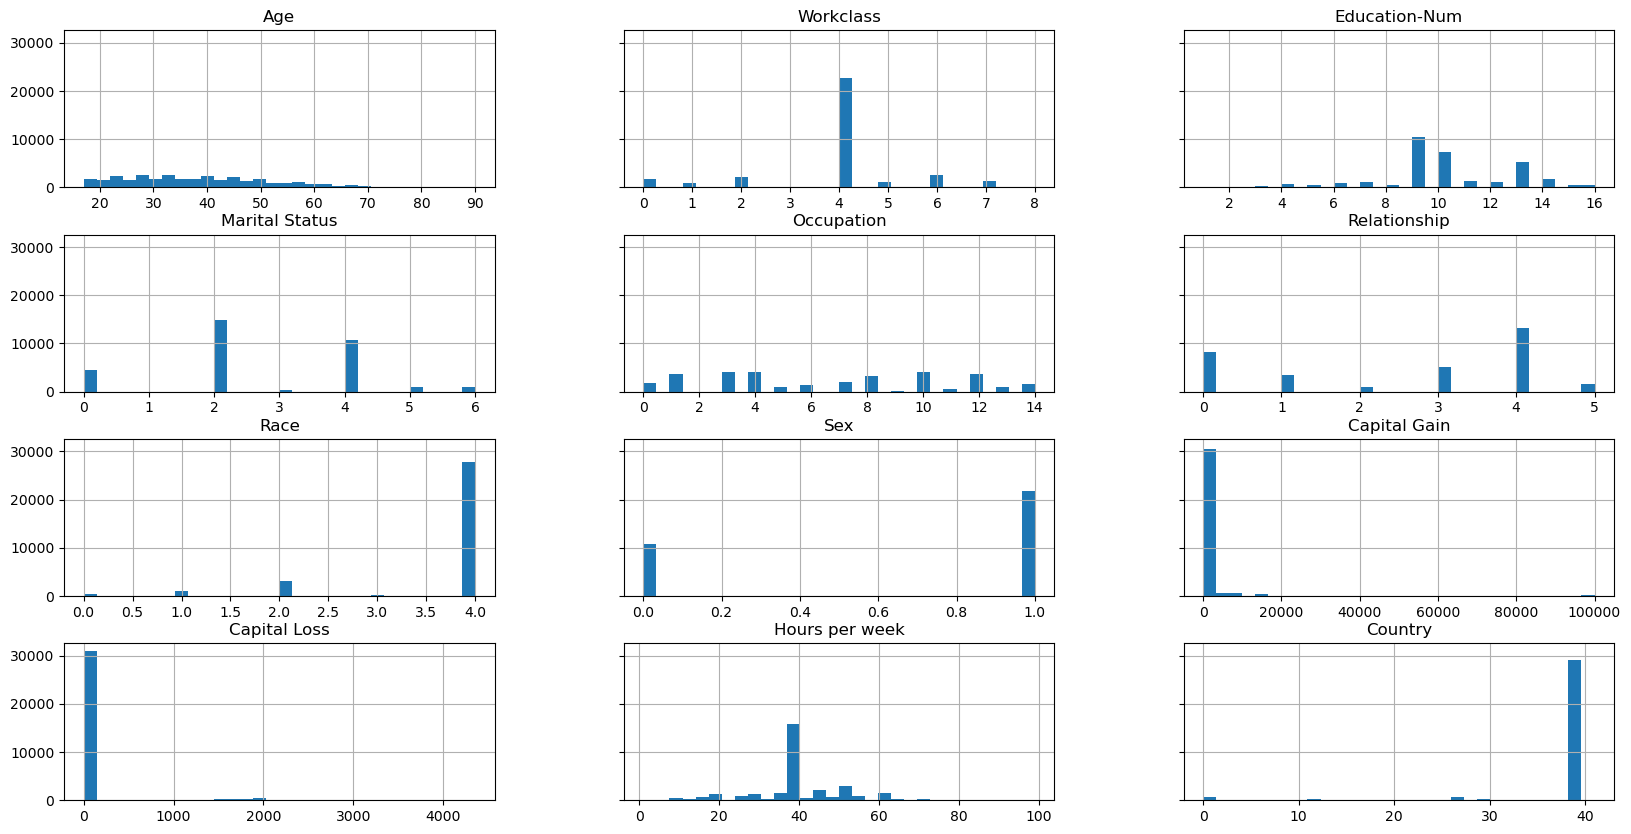

In [4]:
hist = X.hist(bins=30, sharey=True, figsize=(20, 10))

### Split the Dataset into Train, Validation, and Test Datasets

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train_display = X_display.loc[X_train.index]

In [6]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)
X_train_display = X_display.loc[X_train.index]
X_val_display = X_display.loc[X_val.index]

In [7]:
import pandas as pd
train = pd.concat([pd.Series(y_train, index=X_train.index, name='Income>50K', dtype=int), X_train], axis=1)
validation = pd.concat([pd.Series(y_val, index=X_val.index, name='Income>50K', dtype=int), X_val], axis=1)
test = pd.concat([pd.Series(y_test, index=X_test.index, name='Income>50K', dtype=int), X_test], axis=1)

In [8]:
train

,Income>50K,Age,Workclass,Education-Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country
10911,1,47.0,4,9.0,2,3,4,4,1,0.0,0.0,40.0,39
17852,0,31.0,4,13.0,2,7,4,3,1,0.0,0.0,36.0,26
29165,1,32.0,4,10.0,2,13,5,4,0,0.0,0.0,32.0,39
30287,0,58.0,4,9.0,2,3,4,2,1,0.0,0.0,40.0,39
24019,0,17.0,4,6.0,4,6,3,4,1,0.0,0.0,20.0,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21168,0,43.0,4,8.0,2,14,4,4,1,0.0,0.0,40.0,39
6452,0,26.0,4,9.0,4,7,0,4,1,0.0,0.0,52.0,39
31352,0,32.0,7,14.0,2,10,4,4,1,0.0,0.0,50.0,39
6575,0,45.0,4,9.0,4,6,0,4,1,0.0,0.0,40.0,39


In [9]:
validation

,Income>50K,Age,Workclass,Education-Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country
16530,0,25.0,4,4.0,2,6,4,4,1,0.0,0.0,40.0,26
26723,0,41.0,6,9.0,2,5,5,4,0,0.0,0.0,40.0,39
3338,0,79.0,0,9.0,6,0,0,2,0,0.0,0.0,30.0,39
19367,1,43.0,2,15.0,2,10,4,4,1,15024.0,0.0,45.0,39
30274,0,51.0,5,9.0,4,12,2,4,1,0.0,0.0,40.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1604,0,46.0,7,9.0,2,13,4,4,1,0.0,0.0,40.0,39
5937,1,71.0,4,10.0,6,12,0,4,1,0.0,0.0,35.0,39
11034,0,36.0,4,9.0,5,14,2,4,1,0.0,0.0,60.0,26
2819,0,31.0,4,9.0,4,8,0,4,0,0.0,0.0,40.0,39


In [10]:
test

,Income>50K,Age,Workclass,Education-Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country
9646,0,62.0,6,4.0,6,8,0,4,0,0.0,0.0,66.0,39
709,0,18.0,4,7.0,4,8,2,4,1,0.0,0.0,25.0,39
7385,1,25.0,4,13.0,4,5,3,4,1,27828.0,0.0,50.0,39
16671,0,33.0,4,9.0,2,10,4,4,1,0.0,0.0,40.0,39
21932,0,36.0,4,7.0,4,7,1,4,0,0.0,0.0,40.0,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5889,1,39.0,4,13.0,2,10,5,4,0,0.0,0.0,20.0,39
25723,0,17.0,4,6.0,4,12,3,4,0,0.0,0.0,20.0,39
29514,0,35.0,4,9.0,4,14,3,4,1,0.0,0.0,40.0,39
1600,0,30.0,4,7.0,2,3,4,4,1,0.0,0.0,45.0,39


#### Convert the Train and Validation Datasets to CSV Files



In [11]:
train.to_csv('train.csv', index=False, header=False)
validation.to_csv('validation.csv', index=False, header=False)

####  Upload the Datasets to Amazon S3

In [12]:
import sagemaker, boto3, os
bucket = sagemaker.Session().default_bucket()
prefix = "demo-sagemaker-xgboost-adult-income-prediction"

boto3.Session().resource('s3').Bucket(bucket).Object(os.path.join(prefix, 'data/train.csv')).upload_file('train.csv')
boto3.Session().resource('s3').Bucket(bucket).Object(os.path.join(prefix, 'data/validation.csv')).upload_file('validation.csv')

sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /home/ec2-user/.config/sagemaker/config.yaml


In [13]:
! aws s3 ls {bucket}/{prefix}/data --recursive

2024-02-12 23:07:47     786285 demo-sagemaker-xgboost-adult-income-prediction/data/train.csv
2024-02-12 23:07:47     262122 demo-sagemaker-xgboost-adult-income-prediction/data/validation.csv


#### Create and Run a Training Job

In [14]:
import sagemaker

region = sagemaker.Session().boto_region_name
print("AWS Region: {}".format(region))

role = sagemaker.get_execution_role()
print("RoleArn: {}".format(role))

AWS Region: us-west-2
RoleArn: arn:aws:iam::840167646059:role/service-role/AmazonSageMaker-ExecutionRole-20231030T164450


In [15]:
from sagemaker.debugger import Rule, ProfilerRule, rule_configs
from sagemaker.session import TrainingInput

s3_output_location='s3://{}/{}/{}'.format(bucket, prefix, 'xgboost_model')

container=sagemaker.image_uris.retrieve("xgboost", region, "1.2-1")
print(container)

xgb_model=sagemaker.estimator.Estimator(
    image_uri=container,
    role=role,
    instance_count=1,
    instance_type='ml.m4.xlarge',
    volume_size=5,
    output_path=s3_output_location,
    sagemaker_session=sagemaker.Session(),
    rules=[
        Rule.sagemaker(rule_configs.create_xgboost_report()),
        ProfilerRule.sagemaker(rule_configs.ProfilerReport())
    ]
)

246618743249.dkr.ecr.us-west-2.amazonaws.com/sagemaker-xgboost:1.2-1


In [16]:
xgb_model.set_hyperparameters(
    max_depth = 5,
    eta = 0.2,
    gamma = 4,
    min_child_weight = 6,
    subsample = 0.7,
    objective = "binary:logistic",
    num_round = 1000
)

In [17]:
from sagemaker.session import TrainingInput

train_input = TrainingInput(
    "s3://{}/{}/{}".format(bucket, prefix, "data/train.csv"), content_type="csv"
)
validation_input = TrainingInput(
    "s3://{}/{}/{}".format(bucket, prefix, "data/validation.csv"), content_type="csv"
)

In [18]:
xgb_model.fit({"train": train_input, "validation": validation_input}, wait=True)

INFO:sagemaker:Creating training-job with name: sagemaker-xgboost-2024-02-12-23-08-05-336


2024-02-12 23:08:05 Starting - Starting the training job...
2024-02-12 23:08:32 Starting - Preparing the instances for trainingCreateXgboostReport: InProgress
ProfilerReport: InProgress
......
2024-02-12 23:09:32 Downloading - Downloading input data......
2024-02-12 23:10:32 Downloading - Downloading the training image...
2024-02-12 23:10:54 Training - Training image download completed. Training in progress..[2024-02-12 23:11:07.440 ip-10-0-82-224.us-west-2.compute.internal:8 INFO utils.py:27] RULE_JOB_STOP_SIGNAL_FILENAME: None
INFO:sagemaker-containers:Imported framework sagemaker_xgboost_container.training
INFO:sagemaker-containers:Failed to parse hyperparameter objective value binary:logistic to Json.
Returning the value itself
INFO:sagemaker-containers:No GPUs detected (normal if no gpus installed)
INFO:sagemaker_xgboost_container.training:Running XGBoost Sagemaker in algorithm mode
INFO:root:Determined delimiter of CSV input is ','
INFO:root:Determined delimiter of CSV input is '

In [19]:
# Get Model Trained location
xgb_model.model_data

's3://sagemaker-us-west-2-840167646059/demo-sagemaker-xgboost-adult-income-prediction/xgboost_model/sagemaker-xgboost-2024-02-12-23-08-05-336/output/model.tar.gz'

In [20]:
import sagemaker
from sagemaker.serializers import CSVSerializer
xgb_predictor=xgb_model.deploy(
    initial_instance_count=1,
    instance_type='ml.t2.medium',
    serializer=CSVSerializer()
)

INFO:sagemaker:Creating model with name: sagemaker-xgboost-2024-02-12-23-16-26-113
INFO:sagemaker:Creating endpoint-config with name sagemaker-xgboost-2024-02-12-23-16-26-113
INFO:sagemaker:Creating endpoint with name sagemaker-xgboost-2024-02-12-23-16-26-113


--------!

In [21]:
xgb_predictor.endpoint_name

'sagemaker-xgboost-2024-02-12-23-16-26-113'

### Evaluate the Model Deployed to SageMaker Hosting Services

In [22]:
import numpy as np
def predict(data, rows=1000):
    split_array = np.array_split(data, int(data.shape[0] / float(rows) + 1))
    predictions = ''
    for array in split_array:
        predictions = ','.join([predictions, xgb_predictor.predict(array).decode('utf-8')])
    return np.fromstring(predictions[1:], sep=',')

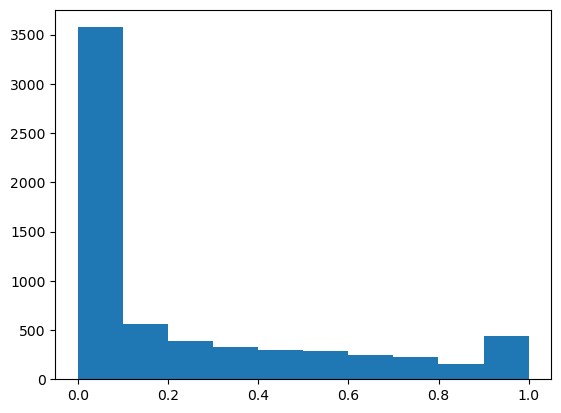

In [23]:
import matplotlib.pyplot as plt

predictions=predict(test.to_numpy()[:,1:])
plt.hist(predictions)
plt.show()

In [35]:
import sklearn

cutoff=0.5
print(sklearn.metrics.confusion_matrix(test.iloc[:, 0], np.where(predictions > cutoff, 1, 0)))
print(sklearn.metrics.classification_report(test.iloc[:, 0], np.where(predictions > cutoff, 1, 0)))

[[4670  356]
 [ 480 1007]]
              precision    recall  f1-score   support

           0       0.91      0.93      0.92      5026
           1       0.74      0.68      0.71      1487

    accuracy                           0.87      6513
   macro avg       0.82      0.80      0.81      6513
weighted avg       0.87      0.87      0.87      6513



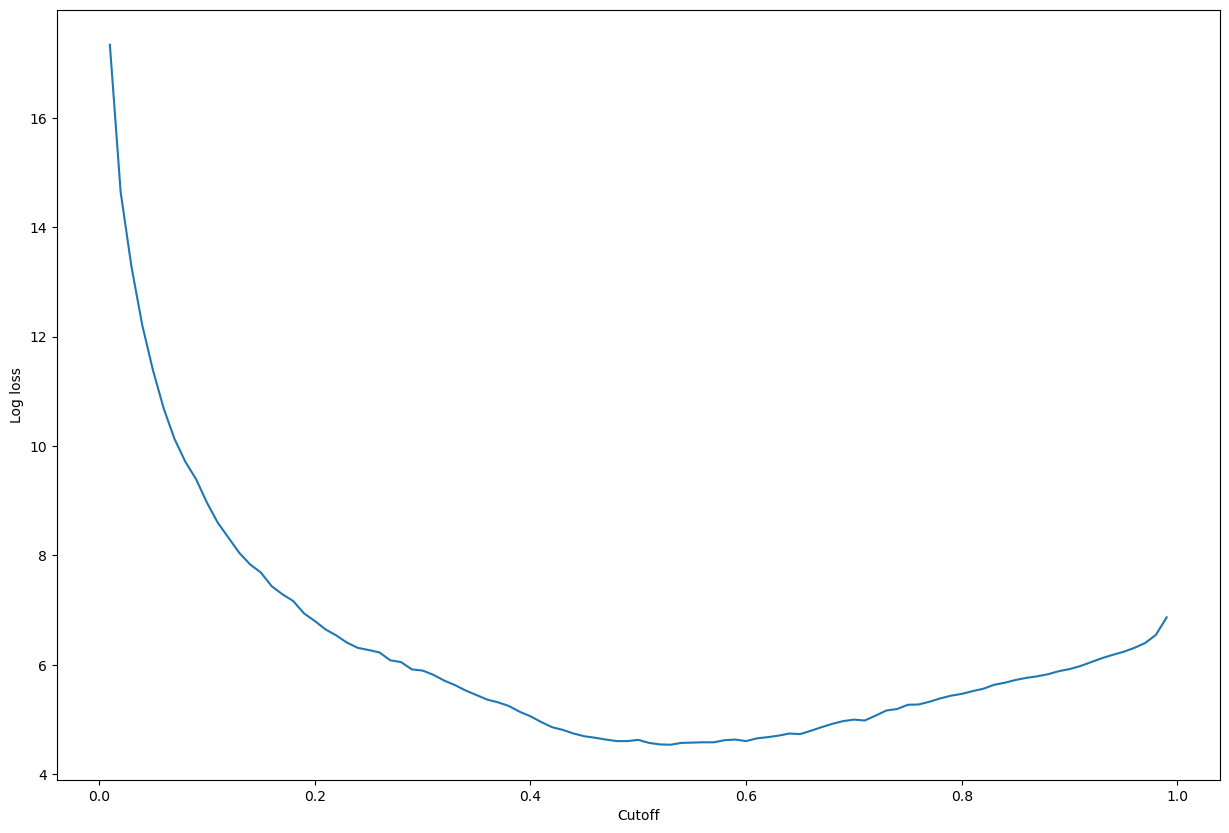

In [25]:
import matplotlib.pyplot as plt

cutoffs = np.arange(0.01, 1, 0.01)
log_loss = []
for c in cutoffs:
    log_loss.append(
        sklearn.metrics.log_loss(test.iloc[:, 0], np.where(predictions > c, 1, 0))
    )

plt.figure(figsize=(15,10))
plt.plot(cutoffs, log_loss)
plt.xlabel("Cutoff")
plt.ylabel("Log loss")
plt.show()

In [26]:
print(
    'Log loss is minimized at a cutoff of ', cutoffs[np.argmin(log_loss)], 
    ', and the log loss value at the minimum is ', np.min(log_loss)
)

Log loss is minimized at a cutoff of  0.53 , and the log loss value at the minimum is  4.537969565342555


In [37]:
import sklearn

cutoff=0.50
print(sklearn.metrics.confusion_matrix(test.iloc[:, 0], np.where(predictions > cutoff, 1, 0)))
print(sklearn.metrics.classification_report(test.iloc[:, 0], np.where(predictions > cutoff, 1, 0)))

[[4670  356]
 [ 480 1007]]
              precision    recall  f1-score   support

           0       0.91      0.93      0.92      5026
           1       0.74      0.68      0.71      1487

    accuracy                           0.87      6513
   macro avg       0.82      0.80      0.81      6513
weighted avg       0.87      0.87      0.87      6513



In [38]:
import sklearn

cutoff=0.53
print(sklearn.metrics.confusion_matrix(test.iloc[:, 0], np.where(predictions > cutoff, 1, 0)))
print(sklearn.metrics.classification_report(test.iloc[:, 0], np.where(predictions > cutoff, 1, 0)))

[[4727  299]
 [ 521  966]]
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      5026
           1       0.76      0.65      0.70      1487

    accuracy                           0.87      6513
   macro avg       0.83      0.80      0.81      6513
weighted avg       0.87      0.87      0.87      6513



### Delete Created Resources

- SageMaker inference Endpoint
- SageMaker inference Endpoint configuration
- SageMaker inference Model
- Delete This SageMaker Notebook